In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib as path
import time
from scipy.stats import linregress

In [301]:
# Load in csv
new_df = pd.read_csv("Resources/cancer_patient.csv")
new_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [302]:
# Looking at the diffrent columns in the data set
new_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [303]:
#Data types
new_df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [304]:
#Determining the age range of data set and mean.
patients_age_min= new_df["Age"].min()
patients_age_max= new_df["Age"].max()
patients_age_mean= new_df["Age"].mean()
print(patients_age_min)
print(patients_age_max)
print(patients_age_mean)


14
73
37.174


In [307]:
cancer_df = new_df.drop(new_df.columns[[0,15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], axis=1)
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,High
996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,High
997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,High
998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,High


In [311]:
#Repopulate wih feamile and males
cancer_df.loc[cancer_df["Gender"] == 1, "Gender"] = "Male"
cancer_df.loc[cancer_df["Gender"] == 2, "Gender"] = "Female"
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level
0,P1,33,Male,2,4,5,4,3,2,2,4,3,2,2,Low
1,P10,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium
2,P100,35,Male,4,5,6,5,5,4,6,7,2,3,4,High
3,P1000,37,Male,7,7,7,7,6,7,7,7,7,7,7,High
4,P101,46,Male,6,8,7,7,7,6,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,7,7,8,7,High
996,P996,37,Female,6,8,7,7,7,6,7,7,7,8,7,High
997,P997,25,Female,4,5,6,5,5,4,6,7,2,3,4,High
998,P998,18,Female,6,8,7,7,7,6,7,7,8,7,7,High


In [312]:
patient_count =cancer_df["Patient Id"].unique()
len(patient_count)


1000

Text(0.5, 1.0, 'Age Distribution')

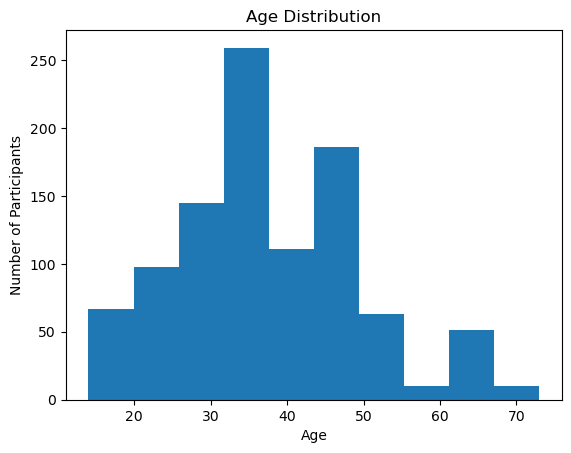

In [313]:
#Age distrubition of patients
plt.hist(cancer_df["Age"])
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.title("Age Distribution")

In [314]:
#
gender_numbers= cancer_df["Gender"].value_counts()
gender_numbers

Male      598
Female    402
Name: Gender, dtype: int64

In [317]:
#Distribution by gender
labels = ["Male", "Female"]
sizes = [598,402]
colors = [ "lightskyblue","lightcoral"]
explode = ( 0.15, 0)

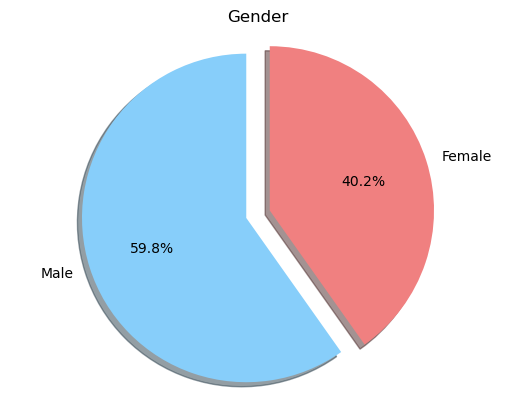

In [318]:
#Pie graph by gender
plt.title("Gender")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [319]:
# Seperation by gender
male_cancer= cancer_df.loc[cancer_df["Gender"]== "Male"]
female_cancer = cancer_df.loc[cancer_df["Gender"]== "Female"]


In [320]:
#finding the mean values based on gender and different categories
male_polltion = male_cancer["Air Pollution"]. mean()
female_pollution = female_cancer["Air Pollution"]. mean()
male_drinking = male_cancer["Air Pollution"]. mean()
female_drinking = female_cancer["Smoking"]. mean()
male_smoking = male_cancer["Air Pollution"]. mean()
female_smoking = male_cancer["Air Pollution"]. mean()
male_passive_smoking = male_cancer["Passive Smoker"]. mean()
female_passive_smoking = male_cancer["Passive Smoker"]. mean()

Text(0.5, 1.0, 'Average Pollution per Gender')

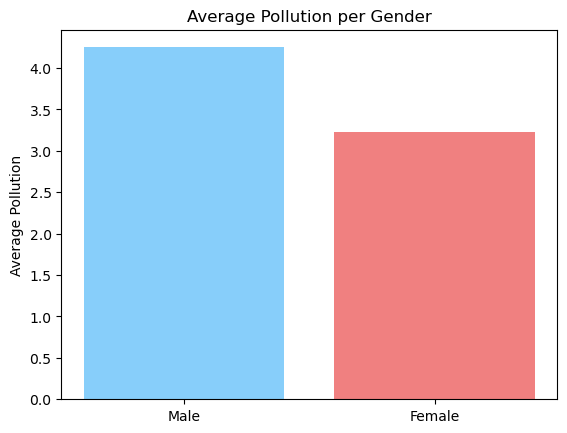

In [321]:
#Bar graph based on gender and Pollution

genders = ['Male', 'Female']
colors = ["lightskyblue","lightcoral"]
total_pollution = [male_polltion, female_pollution]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Pollution")
plt.title("Average Pollution per Gender")

Text(0.5, 1.0, 'Average Drinking per Gender')

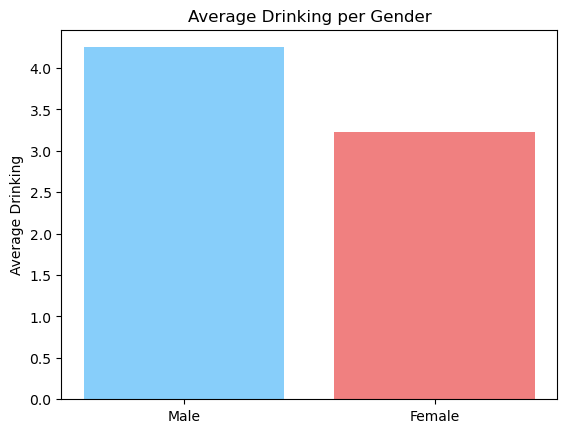

In [322]:
#Bar graph based on average Drinking seperated by gender
total_drinking= [male_drinking, female_drinking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Drinking")
plt.title("Average Drinking per Gender")


Text(0.5, 1.0, 'Average Smoking per Gender')

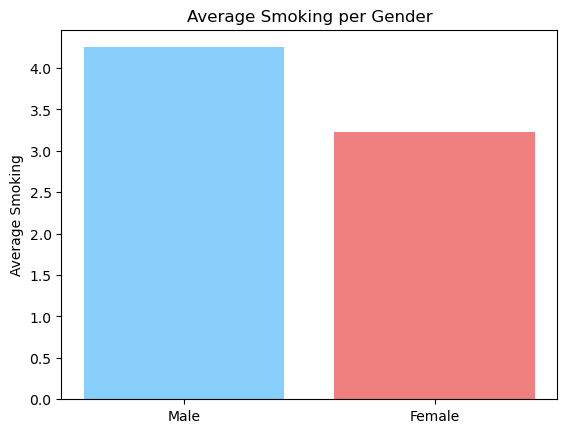

In [323]:
#Bar graph based on average Smoking seperated by gender
total_smoking = [male_smoking, female_smoking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Smoking")
plt.title("Average Smoking per Gender")

Text(0.5, 1.0, 'Average Passive Smoking per Gender')

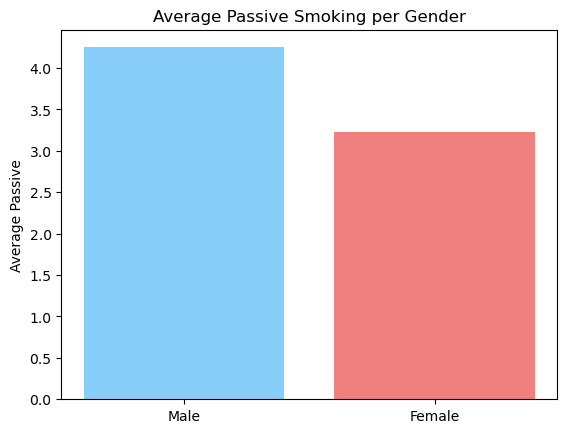

In [324]:
#Bar graph based on average Passive Smoking seperated by gender
total_passive = [male_passive_smoking, female_passive_smoking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Passive")
plt.title("Average Passive Smoking per Gender")

In [326]:
gender_level = cancer_df.groupby('Level')['Gender']. value_counts()
gender_level


Level   Gender
High    Male      252
        Female    113
Low     Female    154
        Male      149
Medium  Male      197
        Female    135
Name: Gender, dtype: int64

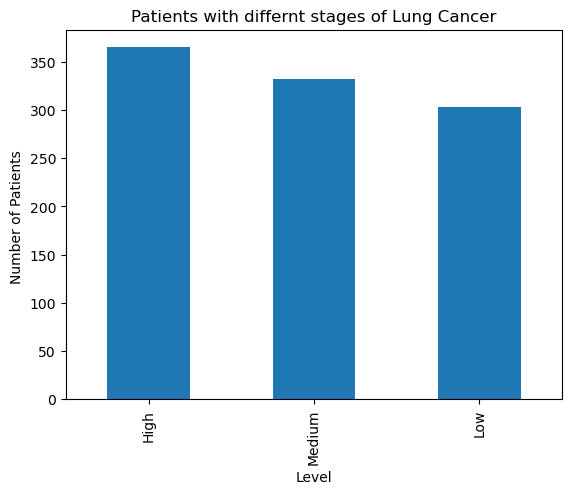

In [327]:
#Level of lung Cancer in patients
total_levels = new_df["Level"].value_counts()
total_levels.plot(kind= "bar")
plt.xlabel("Level")
plt.xticks(rotation = 90)
plt.ylabel("Number of Patients ")
plt.title("Patients with differnt stages of Lung Cancer")
plt.show()

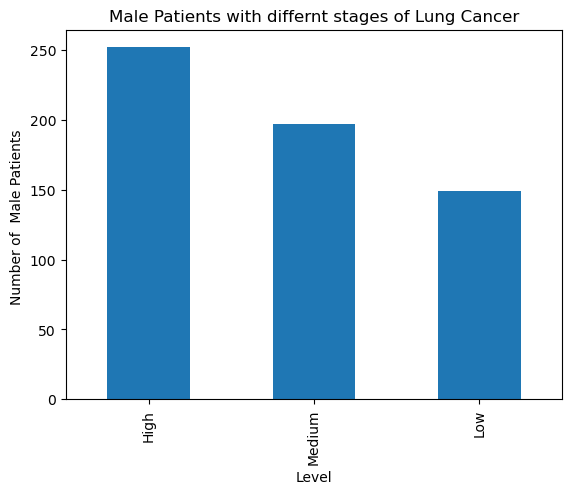

In [328]:
#Levels of lung cancer in male patients
male_lung_cancer = male_cancer["Level"].value_counts()
male_lung_cancer.plot(kind= "bar")
plt.xlabel("Level")
plt.ylabel("Number of  Male Patients ")
plt.title("Male Patients with differnt stages of Lung Cancer")
plt.show()

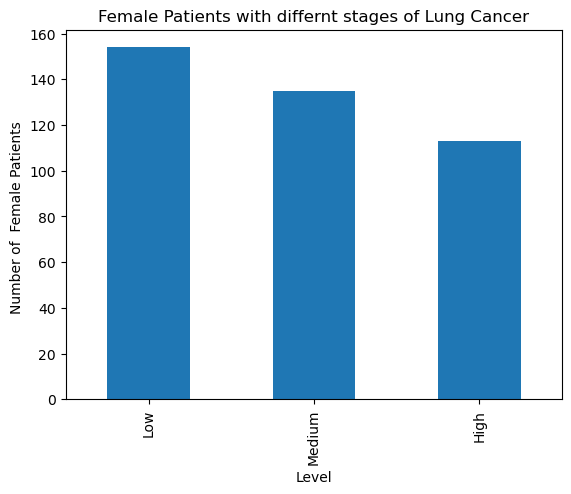

In [329]:
#Levels of Lung Cancer in Females
female_lung_cancer = female_cancer["Level"].value_counts()
female_lung_cancer.plot(kind= "bar")
plt.xlabel("Level")
plt.ylabel("Number of  Female Patients ")
plt.title("Female Patients with differnt stages of Lung Cancer")
plt.show()

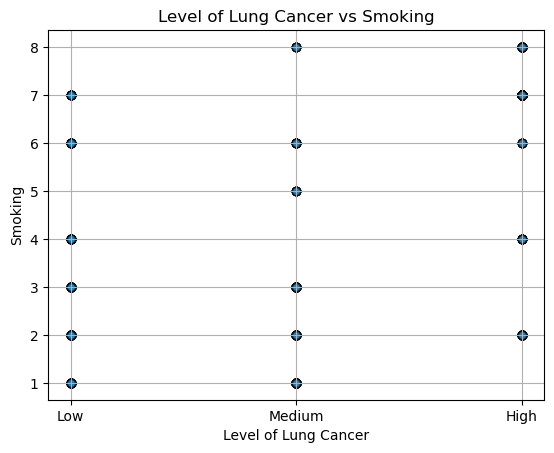

In [330]:
#Scatter plot based on smoking


plt.scatter(cancer_df["Level"], cancer_df["Smoking"], edgecolors= "black",linewidths=1,marker="o",alpha=0.5)
plt.xlabel('Level of Lung Cancer')
plt.ylabel('Smoking')
plt.title('Level of Lung Cancer vs Smoking')
plt.grid(True)
plt.show()


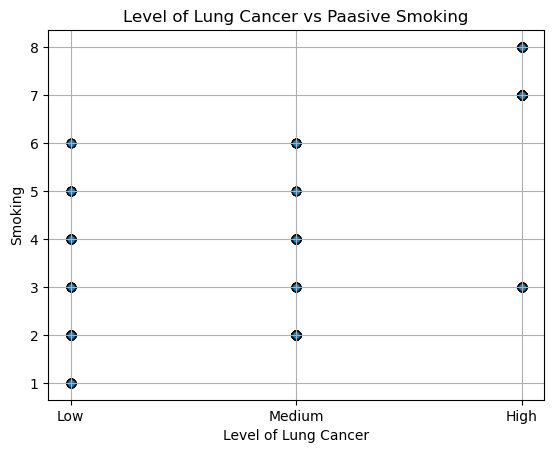

In [331]:
plt.scatter(new_df["Level"], new_df["Passive Smoker"], edgecolors= "black",linewidths=1,marker="o",alpha=0.5)
plt.xlabel('Level of Lung Cancer')
plt.ylabel('Smoking')
plt.title('Level of Lung Cancer vs Paasive Smoking')
plt.grid(True)
plt.show()

In [332]:
#Creating bins based on age
bins= [0, 15, 30, 45, 60, 75]
age_groups =["0-15yrs", "16-30yrs", "31-45yrs", "46-60yrs", "60-75yrs"]


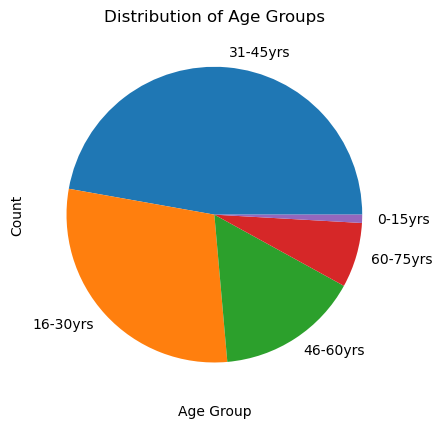

In [337]:
#Distribution of age by bins
age_bins = pd.cut(cancer_df["Age"], bins, labels=age_groups)
age_bins.value_counts().plot(kind= 'pie')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.show()


In [334]:
pollution_level_high= cancer_df.loc[cancer_df["Level"] == "High"] 
pollution_level_med= cancer_df.loc[cancer_df["Level"] == "Medium"] 
pollution_level_low= cancer_df.loc[cancer_df["Level"] == "Low"] 

In [335]:
new_bins= [1,2,3,4,5,6,7]
pollution_groups= ["None", "Low", "Moderatly Low", "Moderate", "Moderatly High", "High"]


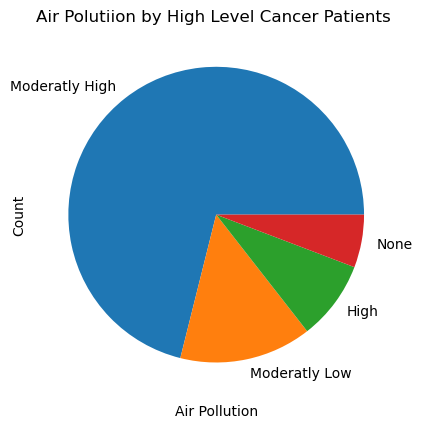

In [336]:
pollution_bins = pd.cut(pollution_level_high["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins.value_counts().plot(kind= 'pie')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polutiion by High Level Cancer Patients ")
plt.show()

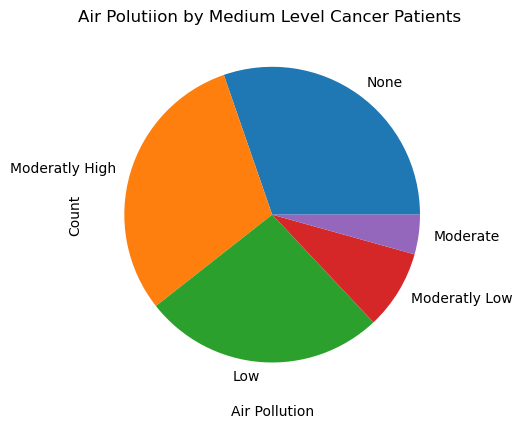

In [299]:
pollution_bins_med = pd.cut(pollution_level_med["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins_med.value_counts().plot(kind= 'pie')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polutiion by Medium Level Cancer Patients ")
plt.show()

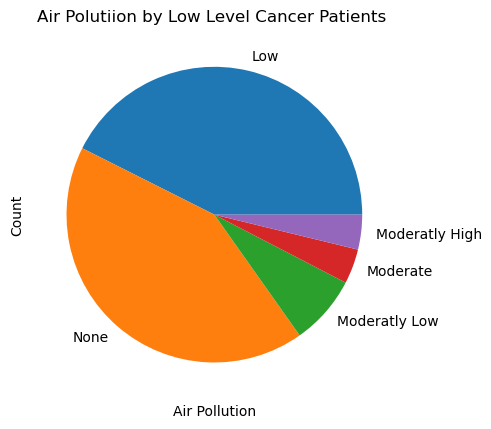

In [298]:
pollution_bins_low = pd.cut(pollution_level_low["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins_low.value_counts().plot(kind= 'pie')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polutiion by Low Level Cancer Patients ")
plt.show()

In [359]:
levels= ['Low', 'Medium', 'High']
pol= []
for levels in levels:
    pollution_levels_df= cancer_df.loc[cancer_df['Level']== levels, 'Air Pollution' ]
    pol.append(pollution_levels_df)

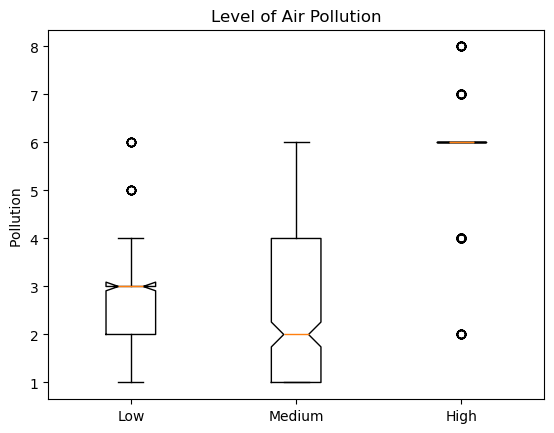

In [360]:
fig1, ax1 = plt.subplots()
ax1.boxplot(pol, levels)
ax1.set_title('Level of Air Pollution')
ax1.set_ylabel('Pollution ')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [367]:
levels_o= ['Low', 'Medium', 'High']
obesity_l= []
for levels_o in levels_o:
    obesity_levels_df= cancer_df.loc[cancer_df['Level']== levels_o, 'Obesity' ]
    obesity_l.append(obesity_levels_df)

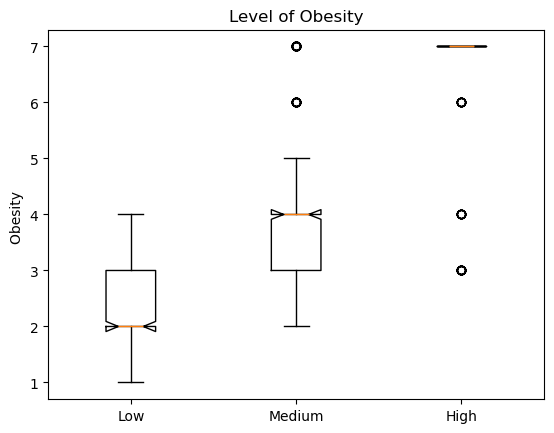

In [369]:
fig2, ax1 = plt.subplots()
ax1.boxplot(obesity_l, levels_o)
ax1.set_title('Level of Obesity')
ax1.set_ylabel('Obesity ')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [375]:
age_bins= [0,24,60,100]
age_groups= ["Young", "Adult", "Senior"]


In [377]:
#use pd.cut to categorize age based on the bins
cancer_df["Age Group"] = pd.cut(cancer_df["Age"], 
                                age_bins, labels=age_groups, include_lowest=True)
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level,Age Group
0,P1,33,Male,2,4,5,4,3,2,2,4,3,2,2,Low,Adult
1,P10,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium,Young
2,P100,35,Male,4,5,6,5,5,4,6,7,2,3,4,High,Adult
3,P1000,37,Male,7,7,7,7,6,7,7,7,7,7,7,High,Adult
4,P101,46,Male,6,8,7,7,7,6,7,7,8,7,7,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,7,7,8,7,High,Adult
996,P996,37,Female,6,8,7,7,7,6,7,7,7,8,7,High,Adult
997,P997,25,Female,4,5,6,5,5,4,6,7,2,3,4,High,Adult
998,P998,18,Female,6,8,7,7,7,6,7,7,8,7,7,High,Young


In [384]:
young_group = cancer_df.loc[cancer_df["Age Group"] == "Young"]
adult_group = cancer_df.loc[cancer_df["Age Group"]== "Adult"]
senior_group = cancer_df.loc[cancer_df["Age Group"] == "Senior"]


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level,Age Group
1,P10,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium,Young
16,P112,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium,Young
19,P115,14,Male,2,4,5,6,5,5,4,6,5,4,6,Medium,Young
20,P116,24,Male,6,8,7,7,6,7,7,3,8,7,9,High,Young
27,P122,19,Male,3,2,4,2,3,2,3,3,2,2,3,Medium,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,P96,18,Female,6,8,7,7,7,6,7,7,8,7,7,High,Young
962,P965,22,Male,6,8,7,7,7,6,2,4,1,2,4,Medium,Young
964,P967,23,Male,3,2,4,2,3,2,3,3,2,2,3,Medium,Young
986,P987,19,Male,6,8,7,7,7,6,7,7,7,8,7,High,Young
